## Membangun Data Pipeline Efisien Menggunakan ETL API di TensorFlow

Selamat datang kembali! Minggu ini, kita akan belajar cara membangun **data pipeline** yang efisien menggunakan **ETL API** di TensorFlow. Mari kita ilustrasikan proses ini: bayangkan Laurence sebagai GPU yang bekerja keras melatih model, dan saya sebagai CPU yang bekerja keras pula. Bagaimana ini bekerja?

### Alur Proses Data Training Menggunakan CPU dan GPU

> **GPU**: “Saya, sebagai GPU, akan melatih model. Saya membutuhkan data yang akan diolah ke dalam **neural network** selama pelatihan, melalui berbagai fungsi loss, optimisasi, dan proses backprop. Hasil akhirnya adalah model yang optimal.”

> **CPU**: “Sebagai CPU, tugas saya adalah menjaga GPU tetap "kenyang" dengan data. Dengan **ETL API**, saya bertugas untuk mengekstrak data, mentransformasi data menggunakan *one-hot encoding*, *bucketizing*, atau teknik lainnya, lalu mendorong data tersebut ke GPU agar dapat digunakan.”

Namun, bagaimana kita bisa membuat proses ini lebih efisien?

### Mengoptimalkan Kerja Paralel CPU dan GPU

Dengan **ETL API** TensorFlow, CPU dan GPU dapat bekerja bersama dengan kecepatan penuh. Saya, sebagai CPU, akan terus mengumpan data kepada GPU, sementara GPU melatih data tersebut. Mengatur CPU dan GPU agar bekerja paralel seperti ini membuat keseluruhan proses pelatihan jauh lebih efisien.

Jika proses ini dilakukan dengan salah, bisa saja terjadi kasus di mana GPU memiliki banyak data untuk diolah, namun CPU menganggur. Atau sebaliknya, GPU tidak memiliki data yang cukup untuk dilatih sehingga menjadi idle. Dengan **ETL API**, kita bisa memastikan GPU selalu siap dengan data baru untuk diolah, dan CPU terus menyuplai data tanpa ada yang terhenti.

### Mengapa Proses Paralel Ini Penting?

Proses yang efisien ini mempercepat pengembangan model, sehingga kita bisa mendapatkan model siap pakai lebih cepat dan menerapkannya di dunia nyata dengan segera. Selain itu, hal ini memungkinkan pengujian lebih cepat serta penerapan yang lebih dini, yang tentunya memberikan dampak lebih cepat pula.

### Implementasi yang Mudah dengan ETL API

Daripada mengimplementasikan proses yang cukup rumit ini secara manual, **ETL API** di TensorFlow memudahkan kita untuk menerapkan pipeline ini dengan efektif. Mari kita lanjutkan untuk mempelajari ETL dalam TensorFlow dan membuat data pipeline yang optimal.


# Bottleneck dalam Machine Learning dan Deep Learning

Dalam konteks machine learning dan deep learning, *bottleneck* adalah komponen atau proses dalam arsitektur model yang memperlambat atau menghambat kinerja dan efisiensi jaringan neural secara keseluruhan. Berikut adalah beberapa jenis bottleneck yang umum ditemui:

## 1. Layer Bottleneck
   Dalam arsitektur neural network, *bottleneck layer* adalah layer dengan jumlah neuron yang lebih sedikit dibandingkan layer sebelumnya dan sesudahnya. Layer ini menciptakan kompresi data dan sering digunakan untuk mereduksi dimensi atau menangkap fitur yang lebih esensial dari data.

   **Contoh Penggunaan**:
   - Pada autoencoder, layer bottleneck terletak di tengah model untuk menghasilkan representasi data yang lebih kompak.
   - Pada model residual seperti *ResNet*, bottleneck digunakan untuk mengurangi jumlah parameter dan meningkatkan efisiensi model.

## 2. Computational Bottleneck
   Bottleneck komputasi terjadi saat perangkat keras (CPU, GPU, atau memori) tidak mampu memproses data dengan kecepatan yang diperlukan, sering kali disebabkan oleh:
   - **Memori Terbatas**: Data atau model terlalu besar, sehingga memori tidak cukup.
   - **Kecepatan Prosesor**: CPU/GPU terlalu lambat untuk komputasi yang dibutuhkan.
   - **Bandwidth I/O**: Transfer data antara memori dan GPU lambat, memperlambat pelatihan.

   **Solusi**:
   - Memperbesar *batch size* atau mengoptimalkan *data pipeline*.
   - Menggunakan perangkat keras yang lebih kuat seperti GPU yang lebih cepat atau TPU.

## 3. Data Bottleneck
   Bottleneck ini terjadi ketika pengumpulan atau pemrosesan data terlalu lambat untuk memenuhi kebutuhan model. Jika proses membaca data dari disk atau augmentasi data lambat, ini akan membuat GPU menunggu data yang siap diproses.

   **Solusi**:
   - Menggunakan teknik *data prefetching* atau *data pipeline* yang lebih efisien.
   - Melakukan caching data atau menyimpan data yang sering digunakan di memori yang lebih cepat.

## 4. Inference Bottleneck
   Bottleneck selama inferensi (prediksi) terjadi ketika model membutuhkan waktu terlalu lama untuk memproses data dalam waktu nyata (real-time). Hal ini sering disebabkan oleh ukuran model yang besar atau operasi komputasi yang intensif.

   **Solusi**:
   - Menggunakan teknik kompresi model seperti *pruning* (menghapus neuron yang tidak penting) atau *quantization* (menggunakan tipe data lebih kecil).
   - Mengubah arsitektur model, misalnya dengan mengganti layer berat dengan layer yang lebih ringan.

Meminimalkan bottleneck dalam deep learning dapat meningkatkan efisiensi model, baik dalam pelatihan maupun prediksi.

## Optimalisasi Pelatihan dengan Desain Data Pipeline yang Efisien

Biasanya, kita mungkin berpikir bahwa perangkat keras yang lebih besar dan cepat, seperti **CPU**, **GPU**, atau **TPU** yang lebih baik, adalah kunci untuk pelatihan yang lebih cepat. Meskipun benar, perangkat keras ini bisa sangat tidak efisien jika **data pipeline** tidak dirancang dengan baik. Hal ini sangat terasa saat menggunakan pelatihan paralel pada beberapa prosesor. Oleh karena itu, desain data pipeline untuk input data bisa sama pentingnya dengan desain lapisan model itu sendiri dalam mencapai pelatihan yang efisien. Tentu saja, model yang baik tetap diperlukan untuk **inference** yang akurat, tetapi minggu ini kita akan fokus pada **pipeline** dan operasi dalam `tf.data` yang memungkinkan Anda merancangnya secara optimal.

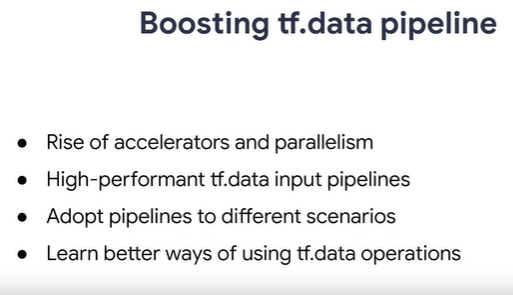

### Konsep ETL (Extract, Transform, Load)

Kembali ke proses **ETL (Extract, Transform, Load)** yang telah kita bahas sejak minggu pertama, sekarang kita akan lebih memikirkan cara mengoptimalkannya dari awal hingga akhir. Langkah pertama adalah **memuat data** dari lokasi penyimpanannya. Data ini bisa berasal dari penyimpanan lokal seperti **HDD** atau **SSD**, atau bisa juga dari sumber jarak jauh seperti basis data, penyimpanan awan, atau sumber lainnya.

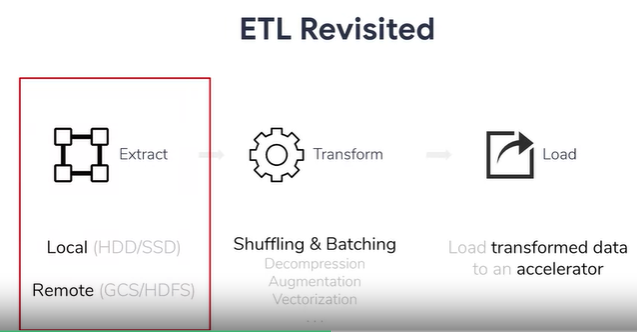

### Menggunakan TFDS untuk Memuat Data

Sangat disarankan untuk menggunakan **TFDS (TensorFlow Datasets)** untuk memuat data jika memungkinkan, karena TFDS menawarkan berbagai opsi untuk mengelola, mentransformasi, dan menyiapkan data sebelum dimasukkan ke dalam model. Ini menghemat banyak waktu dan tenaga yang biasanya dihabiskan untuk kode pemuatan data, serta kodenya umumnya telah dioptimalkan untuk kinerja. Dengan TFDS, Anda juga memiliki banyak opsi untuk transformasi data.

Transformasi data ini bukan sekadar memetakan dari satu format ke format lain. Misalnya, seperti yang telah kita lihat dalam beberapa minggu terakhir, ada banyak persiapan lain seperti mengonversi data ke dalam kategori numerik, menormalkan data, dan sebagainya. Selain itu, TFDS membantu mengelola kebutuhan teknis dalam pemrosesan, seperti menyimpan data di tempat sementara selama pemrosesan dan manajemen lainnya.

### Tahap Loading Data

Setelah melalui tahapan transformasi, pada tahap ini kita berharap memiliki data yang bersih dan terstruktur secara teratur untuk dimasukkan ke dalam model pelatihan. Proses ini memastikan data siap dalam format yang diperlukan untuk pelatihan yang optimal dan akurat.



## Perspektif Prosesor dalam Pelatihan Model

Saat melatih model, kita perlu mempertimbangkan proses dari sudut pandang prosesor. Biasanya, langkah awal dalam proses ini adalah bagian *preprocessing*, yaitu ekstraksi dan transformasi data. Tahap ini dilakukan pada **CPU** karena melibatkan tugas-tugas seperti pemuatan, penyimpanan, pengacakan, dan konversi data yang tidak dapat dijalankan pada **GPU** atau **TPU**. Setelah preprocessing, pelatihan model dijalankan pada GPU atau TPU untuk memanfaatkan peningkatan kinerja yang signifikan.

Namun, pemrosesan awal di CPU sering menjadi hambatan (*bottleneck*) dalam alur kerja ini. Perhatikan bahwa pada tahap persiapan data, perangkat keras yang dipercepat seperti GPU atau TPU belum terlibat sehingga tidak digunakan, dan hanya mulai aktif saat proses pelatihan model dimulai. Kondisi ini dapat menyebabkan waktu *idle* pada GPU/TPU yang sebenarnya bisa dimanfaatkan lebih efisien.

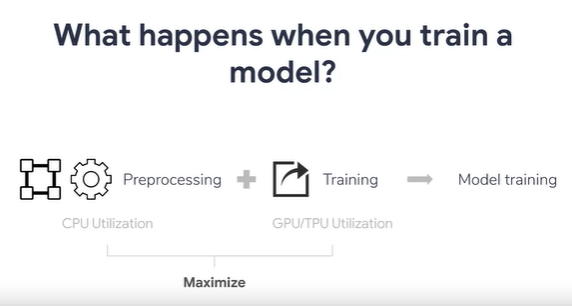

### Tantangan dalam Penyimpanan Data untuk Pelatihan Model

Ketika bekerja pada proyek pembelajaran mesin dalam skala kecil, *data-set* mungkin cukup disimpan di penyimpanan lokal yang kecil seperti *hard drive* tunggal. Namun, dalam skenario nyata, *data-set* yang lebih besar mungkin memerlukan penyimpanan yang lebih luas baik di memori maupun disk. Di sinilah **distributed data** atau data terdistribusi menjadi esensial. Dalam situasi nyata, membagi (*sharding*) data ke lingkungan terdistribusi tidak hanya memungkinkan kita menampung lebih banyak data tetapi juga memungkinkan pelatihan yang terdistribusi untuk efisiensi maksimal.

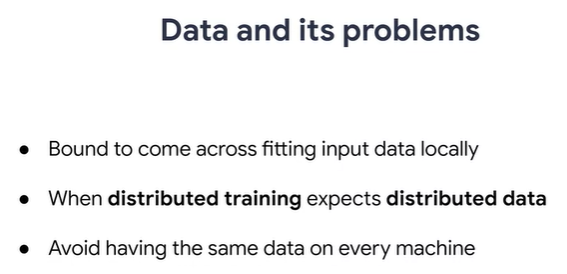

Pada skenario data terdistribusi, kita perlu berhati-hati karena pemuatan data dari berbagai lokasi menjadi hambatan potensial, mengingat CPU seringkali menangani ekstraksi dan transformasi data sebelum diteruskan ke GPU atau TPU untuk pelatihan.

### Efisiensi dengan Pendekatan Pipelining

Pendekatan **pipelining** dapat membantu meminimalkan waktu *idle* pada perangkat keras kita. Pada metode konvensional, kita mungkin memproses batch data secara sekuensial, yang menyebabkan GPU atau TPU tidak aktif selama persiapan batch berikutnya. Sebagai contoh, kita mungkin mempersiapkan batch pertama di CPU, lalu mentransfer batch tersebut ke GPU untuk pelatihan, sementara CPU memulai persiapan batch kedua. Dalam skenario ini, baik CPU maupun GPU akan mengalami waktu *idle* bergantian.

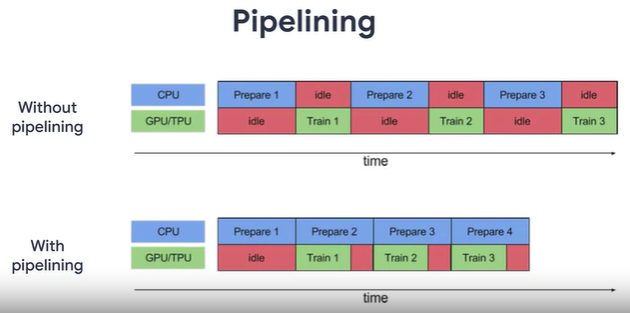

Dengan pipelining, kita dapat menyiapkan batch berikutnya saat GPU sedang melatih batch yang aktif. Begitu batch pertama dilatih, batch kedua sudah siap, dan proses berlanjut secara paralel untuk batch-batch berikutnya. Dengan mengurangi waktu tunggu antara CPU dan GPU, pipelining memungkinkan kita mencapai efisiensi yang lebih tinggi dalam pelatihan model.

### Menghindari Bottleneck dan Meningkatkan Kinerja

Pipelining membantu kita mengurangi hambatan khususnya pada bagian CPU dari proses **ETL** (*Extraction, Transformation, and Loading*). Dengan mengoptimalkan alur kerja ini, kita dapat memastikan bahwa waktu *idle* diminimalkan, sehingga keseluruhan proses menjadi lebih efisien. Dalam sesi selanjutnya, kita akan membahas beberapa teknik praktis yang dapat diimplementasikan untuk meningkatkan performa alur ini lebih jauh.


## Pendekatan Paralelisme dengan `tf.data` pada TensorFlow

Setelah melihat manfaat *caching*, mari kita eksplorasi **paralelisme** dalam `tf.data` di TensorFlow. Paralelisme `tf.data` mencakup tiga aspek utama: `map`, `prefetch`, dan `interleave`. Berikut ini adalah penjelasan singkat mengenai setiap operasi yang akan kita bahas lebih lanjut.

### Map Transformation

**Transformasi `map`** adalah metode yang memungkinkan kita menerapkan fungsi pada setiap elemen dalam dataset. Misalnya, dalam tugas augmentasi gambar untuk klasifikasi, kita sering menerapkan transformasi seperti pembalikan acak, variasi kecerahan, saturasi, hue, dan kontras, serta normalisasi dan perubahan ukuran gambar. Meskipun setiap operasi ini secara individual tidak terlalu berat, jika digabungkan, beban komputasi bisa menjadi sangat tinggi. 

Transformasi ini cenderung dilakukan *element-wise*, yang dapat menyebabkan CPU tidak termanfaatkan secara optimal. Untuk itu, `tf.data` menawarkan cara untuk menjalankan transformasi ini secara paralel. 

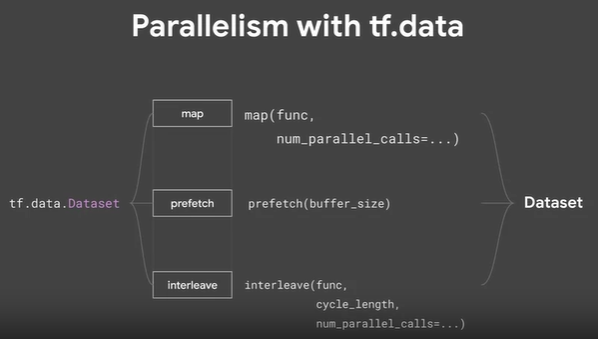

#### Implementasi Paralel dalam `map`

Jika kita membungkus semua augmentasi dalam sebuah fungsi (misalnya, `augment`), fungsi ini dapat diterapkan ke dataset sebagai fungsi pemetaan. Di sinilah paralelisme berperan penting. Fungsi `map` memiliki parameter `num_parallel_calls` yang menentukan jumlah core CPU yang akan digunakan. Dengan memanfaatkan banyak core, kita dapat mengurangi latensi dalam pipeline pelatihan.

- **Penggunaan Parameter `num_parallel_calls`**: Parameter ini memungkinkan kita untuk menjalankan transformasi `map` pada beberapa core CPU sekaligus. Misalnya, jika kita mengaturnya menjadi `1`, hanya satu core yang akan digunakan. Namun, untuk mempercepat proses, kita dapat menyesuaikan jumlah core yang digunakan.

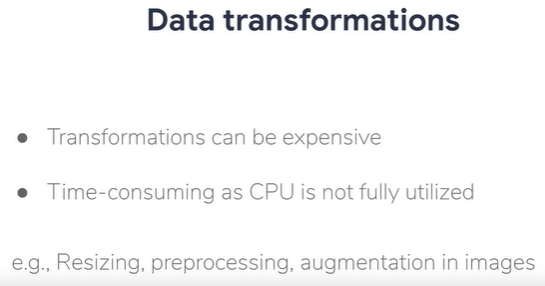

#### Menentukan Jumlah Core yang Optimal

Menentukan nilai optimal untuk `num_parallel_calls` dapat bervariasi. Salah satu pendekatan umum adalah menggunakan seluruh core CPU yang tersedia pada mesin Anda. Namun, dalam skenario perangkat keras yang lebih kompleks atau lingkungan virtual yang terus berubah, menggunakan semua core mungkin bukan keputusan terbaik. TensorFlow menyediakan beberapa fitur menarik untuk mengatasi masalah ini dan menyesuaikan performa secara otomatis sesuai lingkungan.

### Prefetch dan Interleave (Gambaran Singkat)

Selain `map`, **prefetch** dan **interleave** adalah dua metode paralelisme lain yang dapat meningkatkan efisiensi pipeline data:
- **Prefetch**: Mengambil batch berikutnya saat model masih memproses batch saat ini, mengurangi latensi antar batch.
- **Interleave**: Memungkinkan pengambilan dan pemrosesan data secara berurutan dari beberapa sumber dataset, sangat berguna untuk data yang dibagi di berbagai lokasi.

### Kesimpulan

Dengan `tf.data`, kita dapat mengoptimalkan pipeline pelatihan melalui paralelisme, memungkinkan *training* lebih efisien dan mengurangi hambatan dalam memanfaatkan sumber daya CPU dan GPU secara penuh. Selanjutnya, kita akan mengeksplorasi teknik implementasi lanjutan untuk meningkatkan performa pipeline lebih jauh.


## Auto-tuning Paralelisme dan Prefetch di `tf.data`

### Auto-tune untuk Paralelisme
Manual setting seperti `num_parallel_calls` dalam `map` dapat meningkatkan performa, tetapi untuk mencapai penggunaan CPU yang optimal, lebih baik menggunakan **auto-tune**. Dengan auto-tune, TensorFlow secara dinamis menyesuaikan level paralelisme pada runtime untuk memaksimalkan penggunaan CPU. Ini melibatkan:
- Penyesuaian ukuran buffer dataset
- Menentukan seberapa banyak anggaran CPU yang akan digunakan

Auto-tune akan secara otomatis memilih jumlah paralelisme yang ideal berdasarkan jumlah core CPU yang tersedia, mengoptimalkan pemrosesan.

### Menggunakan Auto-tune dengan `map`
Alih-alih mengatur jumlah paralelisme secara manual, kita bisa menggunakan `AUTOTUNE` untuk membiarkan TensorFlow menangani tuning ini secara otomatis. Contoh penggunaan:

```python
dataset.map(map_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
```

Prefetch untuk Mengurangi Waktu Idle
Setelah paralelisme dioptimalkan, kita bisa lebih lanjut mengurangi waktu idle dengan prefetch. Fungsi prefetch mendekatkan data yang diperlukan untuk batch berikutnya selama batch saat ini sedang diproses, mirip dengan software pipelining.

Ini dijalankan pada thread latar belakang dengan buffer yang menyimpan elemen dataset yang diprefetch.
Dengan AUTOTUNE, TensorFlow secara otomatis akan menyesuaikan jumlah elemen yang diprefetch berdasarkan kebutuhan pelatihan.
Implementasi Prefetch
Kita dapat menambahkan prefetch dalam pipeline data untuk mengurangi jeda waktu antara produksi dan konsumsi data:

```python
dataset.prefetch(tf.data.experimental.AUTOTUNE)
```

Menggunakan auto-tune dan prefetch bersama-sama dapat meningkatkan efisiensi pipeline pelatihan dan meminimalisasi pemborosan waktu antara tahap pemrosesan dan pelatihan.

## Auto-Tune dan Penggunaan Paralelisme pada tf.data

Menetapkan parameter optimasi secara manual, seperti `num_parallel_calls` pada fungsi `map`, memang dapat memberikan peningkatan, namun hasilnya terbatas. Menetapkan parameter ini secara manual mungkin tidak membantu Anda mencapai penggunaan CPU yang maksimal. Di sinilah **auto-tune** berperan untuk mengoptimalkan nilai-nilai tersebut secara dinamis pada saat runtime. Auto-tune memberikan keputusan tentang level paralelisme yang harus digunakan untuk runtime **tf.data**.

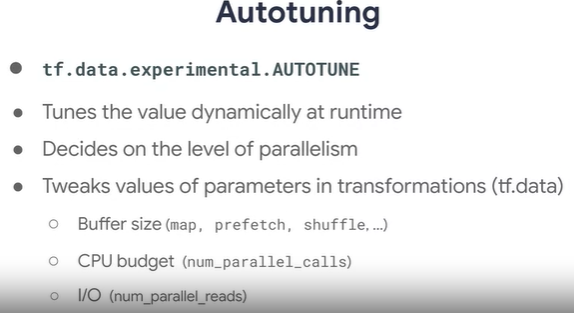

### Cara Kerja Auto-Tune

Di balik layar, auto-tune mengidentifikasi algoritma yang digunakan untuk melakukan optimasi autotune. Ini bisa berupa penyesuaian ukuran buffer dari dataset atau menentukan seberapa banyak anggaran CPU yang akan digunakan. Selain itu, terkait dengan paralelisasi panggilan secara default, perilakunya adalah menggunakan jumlah inti CPU yang dapat dijadwalkan. Secara umum, ini dapat diterapkan pada sebagian besar operasi transformasi dalam **tf.data API**.

### Menggunakan Auto-Tune pada Operasi `map`

Alih-alih mengkodekan jumlah panggilan paralel secara manual, kita dapat memberitahunya untuk melakukan autotune secara otomatis. Ini memungkinkan optimasi dinamis yang lebih efisien daripada menetapkan nilai tetap.

### Penggunaan Prefetch untuk Mengurangi Waktu Idle

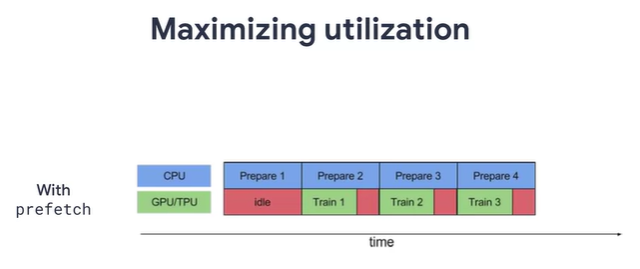

Setelah kita melihat penggunaan paralelisme CPU dengan fungsi seperti `map`, kita perlu mempertimbangkan bagaimana siklus persiapan dan pelatihan dapat dilakukan secara lebih efisien. Salah satu cara untuk mengurangi waktu idle adalah dengan menggunakan operasi **prefetch** pada **tf.data API**. Dengan menggunakan `prefetch`, kita dapat memisahkan waktu antara produksi data dan konsumsi data. 

Ini mirip dengan konsep **software pipelining**, di mana **prefetch** menjalankan thread di latar belakang dan memanfaatkan buffer untuk memuat elemen dari dataset lebih awal. Jumlah item yang perlu di-prefetch sebaiknya sama dengan atau sedikit lebih banyak daripada jumlah batch yang dikonsumsi dalam satu langkah pelatihan. Anda dapat memilih untuk mengoptimalkan nilai ini secara manual atau mengaturnya ke `tf.data.experimental.AUTOTUNE`, yang akan menginstruksikan runtime **tf.data** untuk menangani ini secara otomatis.

Penjelasan:
Auto-tune adalah fitur untuk mengoptimalkan penggunaan paralelisme dan buffer secara otomatis di runtime.

Prefetch digunakan untuk mengurangi waktu idle dalam pipeline pelatihan dengan memuat data lebih awal.

AUTOTUNE memberi instruksi kepada runtime untuk menangani optimasi secara dinamis.

## Paralelisasi Ekstraksi Data

Hingga saat ini, kita telah melihat beberapa operasi transformasi seperti *map* yang dapat diparalelkan. Namun, bagaimana dengan ekstraksi data? Dapatkah kita memparalelkan ini juga?

Pada bagian atas, CPU berusaha mencapai paralelisasi dalam transformasi, tetapi ekstraksi data dari disk menyebabkan overhead dan *I/O*. Selain itu, setelah byte mentah dibaca ke dalam memori, mungkin juga diperlukan deserialisasi dan/atau dekripsi data, yang tentunya membutuhkan perhitungan tambahan. Overhead ini ada terlepas dari apakah data disimpan secara lokal atau jarak jauh, tetapi dapat lebih buruk dalam kasus jarak jauh jika data tidak diambil dengan cara yang efektif.

### Mengurangi Dampak Overhead Ekstraksi Data

Untuk mengurangi dampak dari berbagai overhead ekstraksi, ekstraksi perlu diparalelkan dengan cara menginterleave konten dari setiap dataset. Diagram di bawah ini menggambarkan paralelisme ekstraksi data melalui proses yang disebut *Interleaving*. Di sini, operasi *map* dan *I/O* diinterleave, apakah dieksekusi secara paralel dalam siklus dua.

### Implementasi Paralelisasi Ekstraksi Data

Ini adalah semua *TFRecords* yang dihasilkan ketika sebuah dataset TensorFlow diatur. Anda dapat melihat bahwa semua *TFRecords* tersebut dapat ditemukan di penyimpanan lokal di bawah direktori root. Jadi, mari kita baca data dari *TFRecords* ini dengan memanfaatkan ekstraksi data yang diparalelkan dan pipeline *TF data*.

Untuk mengaktifkan interleaving, kita cukup menyiapkan daftar file yang menunjuk ke daftar file *TFRecord* dan menentukan jumlah pembacaan paralel yang ingin kita gunakan. Kemudian, kita dapat menggunakan metode *interleave* untuk memparalelkan langkah ekstraksi data. Jumlah dataset yang akan di-overlap dapat ditentukan dengan argumen *cycle length*, sementara argumen *num_parallel_calls* dapat menentukan tingkat paralelisme.

Sama seperti transformasi *prefetch* dan *map*, transformasi *interleave* mendukung `tf.data.experimental.AUTOTUNE`. Ini akan mendelegasikan keputusan mengenai ukuran buffer yang digunakan kepada runtime *tf.data*.

### Kesimpulan

Kita telah melihat beberapa teknik dalam bagian *ETL* (Extract, Transform, Load) di mana kita bisa memanfaatkan CPU dengan efisien saat mempersiapkan data untuk pelatihan. Tentu saja, setiap kasus bisa berbeda dan beberapa optimisasi bekerja lebih baik dari yang lain untuk skenario spesifik Anda. Kita akan melihat beberapa praktik terbaik yang bisa Anda gunakan pada video berikutnya. Jadi, silakan lanjutkan ke video berikutnya.

Penjelasan:

Paralelisasi Ekstraksi Data dan Interleaving digunakan untuk mempercepat ekstraksi data, yang sering menjadi bottleneck dalam pipeline data.

TFRecords adalah format penyimpanan data yang digunakan dalam TensorFlow, dan menggunakan interleaving memungkinkan ekstraksi data dari beberapa file secara paralel.

AUTOTUNE memungkinkan TensorFlow menentukan ukuran buffer secara otomatis untuk optimasi performa.

## Praktik Terbaik dalam Parallelization untuk Pipeline ETL

Kita telah membahas proses paralelisasi dalam **Extract, Transform, and Load (ETL) Pipeline** dan cara menggunakan **TF data** untuk meningkatkan kinerja pipeline input data Anda. Sekarang, kita akan melihat beberapa praktik terbaik yang dapat Anda terapkan untuk terus meningkatkan bagian ini dari kode Anda secara keseluruhan.

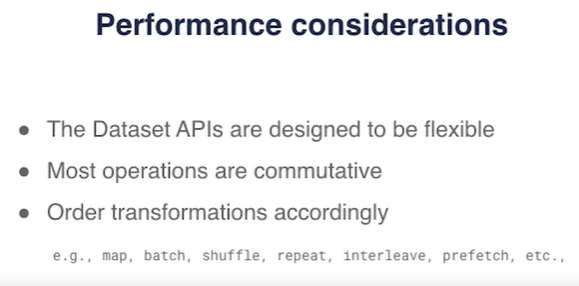

### Pengaruh Urutan Fungsi

Salah satu dampak negatif terbesar jika Anda tidak hati-hati dengan penulisan kode adalah urutan fungsi yang telah kita bahas, terutama **map transformation**. Ini dapat memiliki dampak signifikan terkait dengan penjadwalan dan pelaksanaan fungsi pemetaan yang didefinisikan oleh pengguna. Salah satu cara untuk mengurangi dampak overhead ini adalah dengan **vektorisasi fungsi**. 

Ketika melakukan vektorisasi, kita akan membuat **map** beroperasi pada satu batch input sekaligus, bukan satu per satu. Ada dua cara untuk mencapai ini:
1. Tentunya, Anda dapat mendefinisikan batch dengan menggunakan metode `batch` dan kemudian memetakan itu.
2. Alternatifnya, Anda dapat menggunakan objek **options** dan mengaktifkan **map vectorization**. Kemudian, saat membuat dataset, Anda bisa memanggilnya dengan metode **options** dan menggunakan opsi tersebut.

### Mengoptimalkan Transformasi yang Mahal

Selanjutnya, pertimbangkan skenario di mana data Anda memerlukan banyak transformasi. Dalam hal ini, Anda akan berakhir dengan fungsi yang didefinisikan oleh pengguna yang cukup mahal untuk dieksekusi. Oleh karena itu, disarankan untuk menerapkan **cache transform** setelah transformasi **map**. Hal ini dilakukan untuk menghindari menjalankan transformasi yang mahal secara berulang kali. Anda bisa melakukan ini selama dataset yang dihasilkan masih dapat muat dalam memori atau penyimpanan lokal.

Jika fungsi yang didefinisikan oleh pengguna meningkatkan ruang yang diperlukan untuk menyimpan dataset melebihi kapasitas cache, pertimbangkan untuk melakukan pemrosesan data sebelumnya sebelum pelatihan untuk mengurangi penggunaan sumber daya.


### Pengaruh Urutan Transformasi Repeat dan Shuffle

Seperti yang mungkin sudah Anda ketahui, transformasi **repeat** mengulang data input sejumlah kali, sementara **shuffle** mengacak urutan contoh dalam dataset saat transformasi repeat diterapkan. Jika **repeat** diterapkan sebelum **shuffle**, batas-batas epoch bisa kabur, artinya beberapa elemen bisa diulang sebelum elemen lain muncul untuk pertama kali.

Sebaliknya, jika **shuffle** diterapkan sebelum **repeat**, maka kinerja mungkin melambat pada awal setiap epoch karena inisialisasi status internal dari transformasi shuffle.

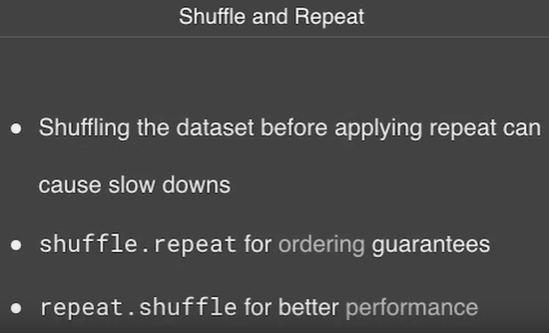

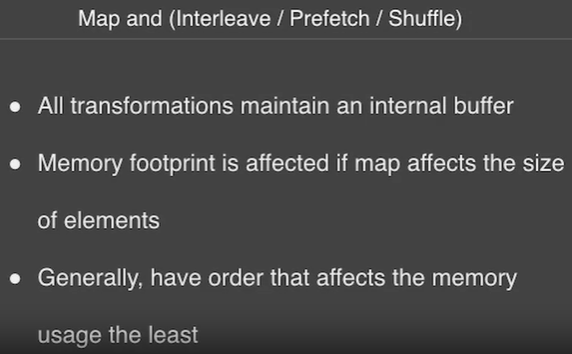

### Urutan Transformasi untuk Kinerja dan Penggunaan Memori

Dari sini, Anda bisa menyimpulkan bahwa lebih baik menerapkan **shuffle** sebelum **repeat** untuk mendapatkan jaminan urutan yang lebih kuat, sementara jika Anda menggabungkan **repeat** lalu **shuffle**, ini memberikan kinerja yang lebih baik. Berbagai transformasi seperti **interleave**, **prefetch**, dan **shuffle** mempertahankan buffer internal elemen. Jika fungsi yang didefinisikan oleh pengguna yang diteruskan ke dalam transformasi map mengubah ukuran elemen, maka urutan transformasi map dan transformasi yang menyimpan elemen dalam buffer akan mempengaruhi penggunaan memori secara keseluruhan.

Secara umum, disarankan untuk memilih urutan yang menghasilkan jejak memori yang lebih kecil, kecuali urutan yang berbeda diinginkan untuk kinerja, misalnya untuk memungkinkan penggabungan transformasi map dan batch.

Penjelasan:

Fokus pada optimasi dan urutan transformasi dalam pipeline ETL untuk kinerja yang lebih baik.

Map Vectorization dan Cache Transform digunakan untuk mempercepat pemrosesan.

Urutan antara Repeat dan Shuffle mempengaruhi kinerja dan pengaturan memori.